In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit_textbook.widgets import binary_widget
from math import sqrt, pi


In [2]:
#binary_widget(nbits=5)

In [3]:
qc_output=QuantumCircuit(8)

In [4]:
qc_output.measure_all()

In [5]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

In [6]:
sim=Aer.get_backend('aer_simulator')

In [7]:
result=sim.run(qc_output).result()

In [8]:
counts=result.get_counts()

In [9]:
counts

{'00000000': 1024}

In [10]:
plot_histogram(counts)

<Figure size 700x500 with 1 Axes>

In [11]:
qc_encode=QuantumCircuit(8)
qc_encode.x(6)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
     ┌───┐
q_6: ┤ X ├
     └───┘
q_7: ─────

In [12]:
qc_encode.measure_all()

In [13]:
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
        ┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ┤ X ├─░──╫──╫──╫──╫──╫──╫─┤M├───
        └───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
              ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

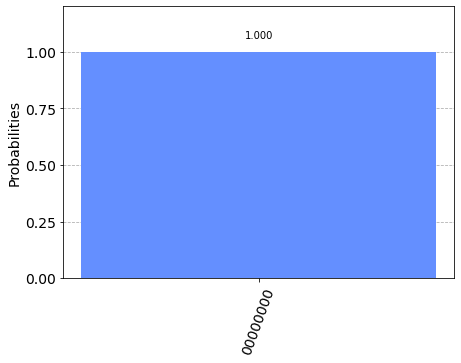

In [14]:
sim=Aer.get_backend('aer_simulator')
result=sim.run(qc_encode).result()
count=result.get_counts()
plot_histogram(counts)

In [15]:
result.get_counts()


{'01000000': 1024}

In [16]:
qc_encode=QuantumCircuit(4)
qc_encode.x(1)
qc_encode.x(3)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [17]:
qc_encode.measure_all()

In [18]:
qc_encode.draw()

░ ┌─┐         
   q_0: ──────░─┤M├─────────
        ┌───┐ ░ └╥┘┌─┐      
   q_1: ┤ X ├─░──╫─┤M├──────
        └───┘ ░  ║ └╥┘┌─┐   
   q_2: ──────░──╫──╫─┤M├───
        ┌───┐ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ X ├─░──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════╩══╩══╩══╩═
                 0  1  2  3

In [19]:
result=sim.run(qc_encode).result()

In [20]:
result.get_counts()

{'1010': 1024}

In [21]:
qc_cnot=QuantumCircuit(4)

qc_cnot.cx(1,3)

qc_cnot.draw()

q_0: ─────
          
q_1: ──■──
       │  
q_2: ──┼──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

In [22]:
qc=QuantumCircuit(2,2)
qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

$q0=|0>, q1=|0> --> q0'=|1>, q1'=|1>, -->CNOT |1> |1> --> |0 1>$

$$|0>=
\begin{bmatrix}
1\\
0
\end{bmatrix}
$$
and
$$|1>=
\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

$$X=
\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

and 
$$CNOT=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
$$

on input $|00>=|0> \otimes |0>$ we have,

$X|0>=|1>$ so in the first stage we have $|11>$. Now we need to apply CNOT on $|11>$ and we have
$$CNOT |11>=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
0 \\
0 \\
0 \\
1 
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
1 \\
0 
\end{bmatrix}=|01>
$$

In [23]:
result=sim.run(qc).result()
counts=result.get_counts()


In [24]:
counts

{'01': 1024}

In [25]:
qc_ha=QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [26]:
qc_ha=QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

| Input (q1 q0) | Output (q1 q0) |
| --- | --- |
| 00  | 00  |
| 01  | 11  |
| 10  | 10  |
| 11  | 01  |


In [27]:
result=sim.run(qc_ha).result()
result.get_counts()

{'10': 1024}

In [28]:
qc=QuantumCircuit(1)
initial_state=[0,1] # initial state is |1>
qc.initialize(initial_state,0)  #apply initialization operation to the 0the qubit
qc.draw()

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

In [29]:
qc=QuantumCircuit(1)
initial_state=[0,1] # initial state is |1>
qc.initialize(initial_state,0)  #apply initialization operation to the 0the qubit
qc.save_statevector() # tell simulator to save statevectore
qobj=assemble(qc)  #create a Qobj from circuit for simulation to run
result=sim.run(qobj).result()

/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [30]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector


[0.+0.j 1.+0.j]


In [31]:
qc.measure_all()

In [32]:
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

In [33]:
result=sim.run(qc).result()

In [34]:
result.get_counts()

{'1': 1024}

In [35]:
qc=QuantumCircuit(1)
initial_state=[1/sqrt(2),1j/sqrt(2)]
qc.initialize(initial_state,0)
qc.save_statevector()
qobj=assemble(qc)
state=sim.run(qobj).result().get_statevector()  #execute the circuit
print(state)

[0.70710678+0.j         0.        +0.70710678j]


/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


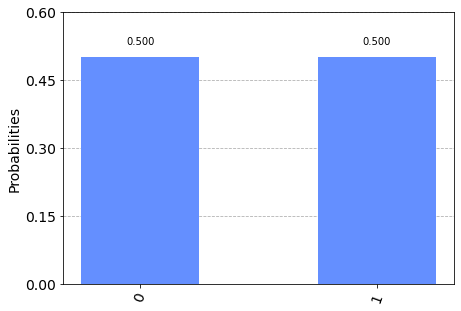

In [36]:
result=sim.run(qobj).result().get_counts()
plot_histogram(result)

In [37]:
qc=QuantumCircuit(1)
initial_state=[1/2,sqrt(3)*1j/2]
qc.initialize(initial_state,0)
qc.save_statevector()
qobj=assemble(qc)
state=sim.run(qobj).result().get_statevector()  #execute the circuit
print(state)

[0.5+0.j        0. +0.8660254j]


/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


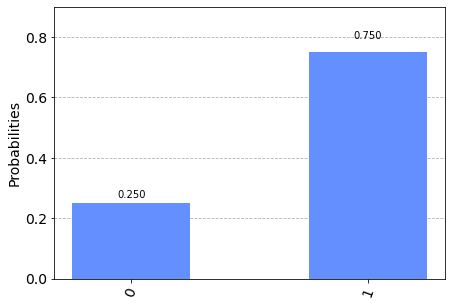

In [38]:
result=sim.run(qobj).result().get_counts()
plot_histogram(result)

The probability of measuring a state $|\psi >$ in the state $|x>$ is:
$$ p(|x>)=|<x|\psi>|^2$$
where the bra $<a|$ is the complex conjugate of ket $|a>$, i.e.,
$$
\begin{bmatrix}
a_1^*, & \dots &, a_n^*
\end{bmatrix}
$$

In [39]:
def collaps(initial_state):
    qc=QuantumCircuit(1)
    qc.initialize(initial_state,0)
    qc.measure_all()
    qc.save_statevector()
    qobj=assemble(qc)
    state=(sim.run(qobj).result().get_statevector())
    return print(str(state))

In [40]:
for i in range(10):
    collaps([1.j/sqrt(2),1/sqrt(2)])

[0.+0.j 1.+0.j]
[0.+1.j 0.+0.j]
[0.+0.j 1.+0.j]
[0.+1.j 0.+0.j]
[0.+0.j 1.+0.j]
[0.+0.j 1.+0.j]
[0.+0.j 1.+0.j]
[0.+0.j 1.+0.j]
[0.+0.j 1.+0.j]
[0.+1.j 0.+0.j]


/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [41]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical

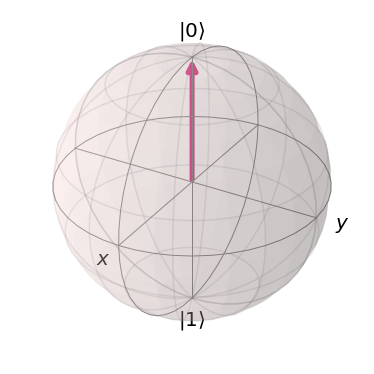

In [47]:
coords=[0,0,1] #[theta, phi, radius]
plot_bloch_vector_spherical(coords)


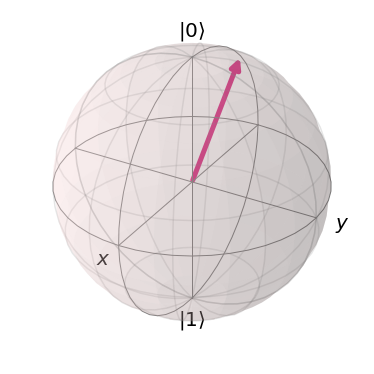

In [50]:
coords2=[pi/4,pi,1]
plot_bloch_vector_spherical(coords2)

In [51]:
from qiskit_textbook.widgets import bloch_calc

In [52]:
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [56]:
from qiskit.visualization import plot_bloch_multivector

In [57]:
qc=QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


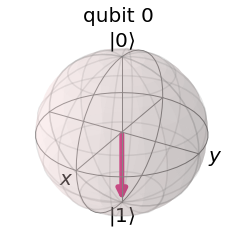

In [58]:
qc.save_statevector()
qobj=assemble(qc)
state=sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [59]:
qc=QuantumCircuit(1)
qc.x(0)
qc.x(0)
qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ X ├
     └───┘└───┘

/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


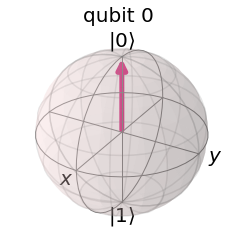

In [60]:
qc.save_statevector()
qobj=assemble(qc)
state=sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [61]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [67]:
qc=QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

/home/mehrdad/.local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


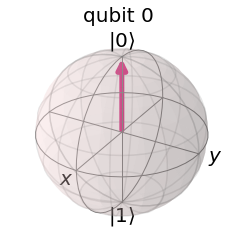

In [68]:
qc.save_statevector()
qobj=assemble(qc)
state=sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [69]:
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [70]:
def x_measurement(qc,qubit,cbit):
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

In [71]:
initial_state=[1/sqrt(2), -1/sqrt(2)]
qc=QuantumCircuit(1,1)
qc.initialize(initial_state,0)
x_measurement(qc,0,0)
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0